# Figure 2

## Imports and colour scheme

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%run _color_tools.ipynb

The color palette is saved in the global variable, C
C = color_palette(blue='#0077bb', green='#009988', orange='#ee7733', red='#cc3311', light_blue='#33bbee', pink='#ee3377', grey='#bbbbbb', black='#000000')


## Import plots

In [2]:
%%capture
%run fig_2_maps_plot.ipynb
%run fig_2_z_loeuf_plot.ipynb
%run fig_2_oe_plots.ipynb
%run fig_2_z_dist_plots.ipynb

In [3]:
# Get upset plot image file
upset = plt.imread("../plots/constraint_in_regions_upset_plot.png")

## Figure construction

In [4]:
cm = 1 / 2.54 # cm to inches convertes

In [5]:
# Helper function used for visualization in the following examples
def identify_axes(ax_dict, fontsize=10):
    """
    Helper to identify the Axes in the examples below.

    Draws the label in a large font in the center of the Axes.

    Parameters
    ----------
    ax_dict : dict[str, Axes]
        Mapping between the title / label and the Axes.
    fontsize : int, optional
        How big the label should be.
    """
    kw = dict(ha="center", va="center", fontsize=fontsize, color="darkgrey")
    for k, ax in ax_dict.items():
        ax.text(0.5, 0.5, k, transform=ax.transAxes, **kw)

(-0.5, 1851.5, 921.5, -0.5)

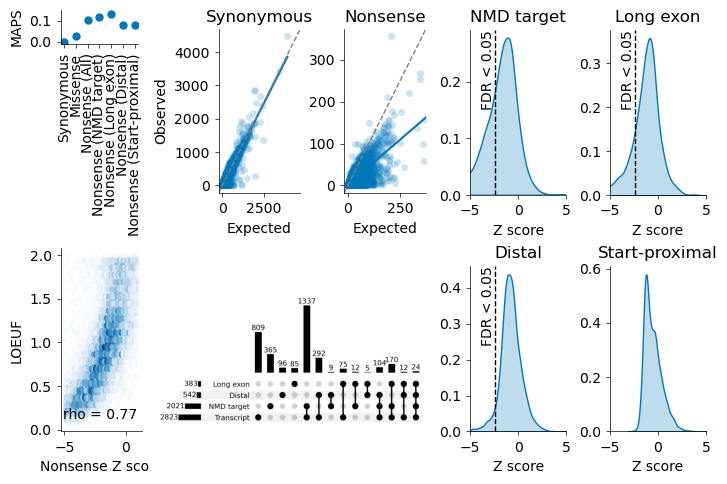

In [6]:
mosaic = """
ABBCC
DEECC
"""

fig = plt.figure(figsize = (18*cm, 12*cm), layout=("constrained"))

subfigs = fig.subfigures(1,3, width_ratios=[1,2,2])

nest_left = subfigs[0].subfigures(2,1)
nest_centre = subfigs[1].subfigures(2,1)
nest_right = subfigs[2]

ax_maps = nest_left[0].subplots(1,1)
ax_z_loeuf = nest_left[1].subplots(1,1)
axs_oe = nest_centre[0].subplots(1,2)
ax_upset = nest_centre[1].subplots(1,1)
axs_z_dist = nest_right.subplots(2,2)
ax_z_nmd = axs_z_dist[0][0]
ax_z_long = axs_z_dist[0][1]
ax_z_distal = axs_z_dist[1][0]
ax_z_start = axs_z_dist[1][1]

plot_maps(maps, ax_maps)
plot_z_loeuf(z_loeuf, ax_z_loeuf)
plot_oe(oe, axs_oe[0], csq="synonymous", ylabel="Observed")
plot_oe(oe, axs_oe[1], csq="nonsense")
plot_z_dist(z_dist, ax_z_nmd, region="nmd_target", title="NMD target")
plot_z_dist(z_dist, ax_z_long, region="long_exon", title="Long exon")
plot_z_dist(z_dist, ax_z_distal, region="distal_nmd", title="Distal")
plot_z_dist(z_dist, ax_z_start, region="start_proximal", title="Start-proximal", FDR_line=False, FDR_label=False)

ax_upset.imshow(upset)
ax_upset.axis("off")


# mosaic = [
#     ["maps","oe_syn","oe_non","z_dist_nmd","z_dist_long"],
#     ["z_loeuf","upset","upset","z_dist_distal","z_dist_start"],
# ]
# axd = fig.subplot_mosaic(mosaic)

# plot_maps(maps, axd["maps"])
# plot_z_loeuf(z_loeuf, axd["z_loeuf"])
# plot_oe(oe, axd["oe_syn"], csq="synonymous", ylabel="Observed")
# plot_oe(oe, axd["oe_non"], csq="nonsense")

# # Insert an image of the upset plot
# axd["upset"].imshow(upset)
# axd["upset"].axis("off")